



Epoch 1/10


550/550 [==============================] - 24s 29ms/step - loss: 1.6158 - accuracy: 0.5015 - val_loss: 0.5766 - val_accuracy: 0.8090
Epoch 2/10
550/550 [==============================] - 15s 27ms/step - loss: 0.3207 - accuracy: 0.8966 - val_loss: 0.2233 - val_accuracy: 0.9196
Epoch 3/10
550/550 [==============================] - 15s 28ms/step - loss: 0.0856 - accuracy: 0.9782 - val_loss: 0.0522 - val_accuracy: 0.9868
Epoch 4/10
550/550 [==============================] - 15s 28ms/step - loss: 0.0321 - accuracy: 0.9940 - val_loss: 0.0294 - val_accuracy: 0.9934
Epoch 5/10
550/550 [==============================] - 14s 25ms/step - loss: 0.0287 - accuracy: 0.9923 - val_loss: 0.1000 - val_accuracy: 0.9661
Epoch 6/10
550/550 [==============================] - 15s 27ms/step - loss: 0.0140 - accuracy: 0.9965 - val_loss: 0.0021 - val_accuracy: 0.9998
Epoch 7/10
550/550 [==============================] - 16s 29ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0015 - val_acc

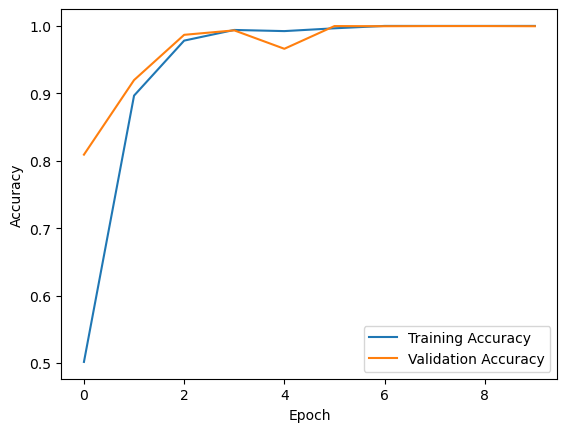

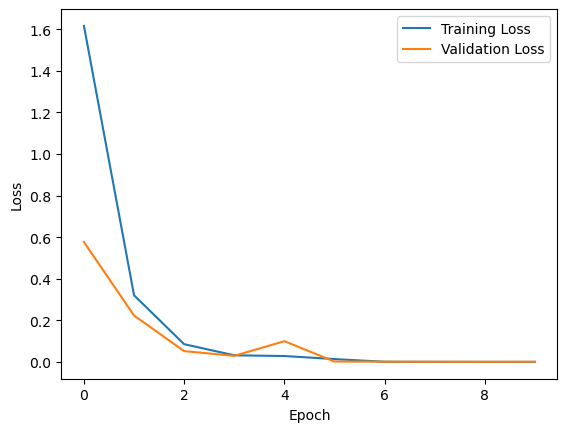

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Read the CSV files
train_df = pd.read_csv('sign_mnist_train.csv')
test_df = pd.read_csv('sign_mnist_test.csv')

# Extract features (X) and labels (y) from the dataframes
X = train_df.drop('label', axis=1).values
y = train_df['label'].values

# Reshape X to 28x28 images (assuming they are grayscale)
X = X.reshape(-1, 28, 28, 1)

# Normalize pixel values to the range [0, 1]
X = X / 255.0

# Split the dataset into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')  # 26 classes for sign language alphabet
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with validation data
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
y_pred = np.argmax(model.predict(X_test), axis=-1)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("Test Set Metrics:")
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Plot training/validation accuracy and loss curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 [==============================] - 0s 32ms/step
Predicted Letter: E


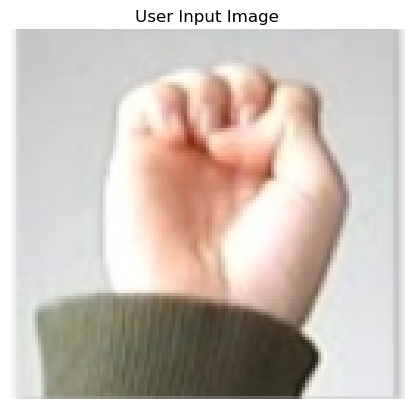

In [4]:
import cv2  # For reading and processing images
import matplotlib.pyplot as plt  # For visualization
from PIL import Image

# Load and preprocess the user input image
def preprocess_input_image(image_path):
    # Read the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Resize the image to 28x28 pixels
    img = cv2.resize(img, (28, 28))
    # Normalize pixel values to the range [0, 1]
    img = img / 255.0
    # Reshape the image to match the model input shape
    img = img.reshape(1, 28, 28, 1)
    return img

#user input image
user_image_path = r"C:\Users\B Rishith Kumar\Desktop\e1.png"

# Preprocess user input image
input_image = preprocess_input_image(user_image_path)

# Make prediction
predicted_probabilities = model.predict(input_image)
predicted_class = np.argmax(predicted_probabilities)

# Map predicted class index to corresponding letter
predicted_letter = chr(predicted_class + 65)  # ASCII for 'A' is 65

# Display the predicted letter
print("Predicted Letter:", predicted_letter)

# Optionally, if you want to display the input image
plt.imshow(Image.open(user_image_path), cmap='gray')
plt.title("User Input Image")
plt.axis('off')
plt.show()
